# ARIMA를 활용한 주식 예측

##테슬라, JPY=X, ZROZ

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


df = pd.read_csv('/content/drive/MyDrive/TSLA.csv',index_col='Date', parse_dates=True)
df_2 = pd.read_csv('/content/drive/MyDrive/JPY=X.csv',index_col='Date', parse_dates=True)
df_3 = pd.read_csv('/content/drive/MyDrive/ZROZ.csv',index_col='Date', parse_dates=True)
ts = df['Close']
ts_2 = df_2['Close']
ts_3 = df_3['Close']
df_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-26,110.542999,110.580002,110.125999,110.543999,110.543999,0
2021-07-27,110.306999,110.319000,109.625000,110.302002,110.302002,0
2021-07-28,109.783997,110.216003,109.747002,109.806000,109.806000,0
2021-07-29,109.878998,109.889000,109.471001,109.890999,109.890999,0
2021-07-30,109.390999,109.792999,109.366997,109.408997,109.408997,0


In [17]:
ts = ts.interpolate(method='time')
ts_2 = ts_2.interpolate(method='time')
ts_3 = ts_3.interpolate(method='time')
print(ts[ts.isna()], ts_2[ts_2.isna()], ts_3[ts_3.isna()])

Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64)


In [18]:
ts_log = np.log(ts)
ts_2_log = np.log(ts_2)
ts_3_log = np.log(ts_3)

In [19]:
from statsmodels.tsa.stattools import adfuller
augmented_dickey_fuller_test(ts_log)
augmented_dickey_fuller_test(ts_2_log)
augmented_dickey_fuller_test(ts_3_log)

 #시계열 데이터의 안정성을 테스트하는 통계적 방법

Results of Dickey-Fuller Test:
Test Statistic                  -1.950244
p-value                          0.308806
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   0.655892
p-value                          0.988915
#Lags Used                       0.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.573630
p-value                          0.876830
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.57

In [20]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
print('슝=3')

슝=3


In [21]:
def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    
print('슝=3');

슝=3


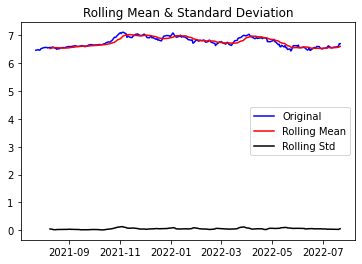

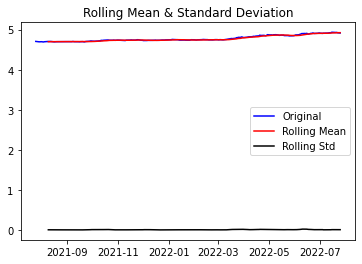

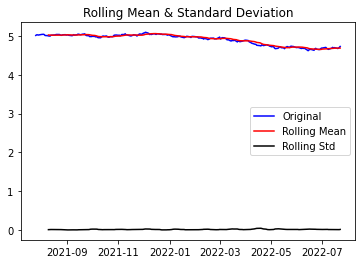

Results of Dickey-Fuller Test:
Test Statistic                  -1.950244
p-value                          0.308806
#Lags Used                      10.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   0.655892
p-value                          0.988915
#Lags Used                       0.000000
Number of Observations Used    260.000000
Critical Value (1%)             -3.455754
Critical Value (5%)             -2.872721
Critical Value (10%)            -2.572728
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -0.573630
p-value                          0.876830
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.57

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

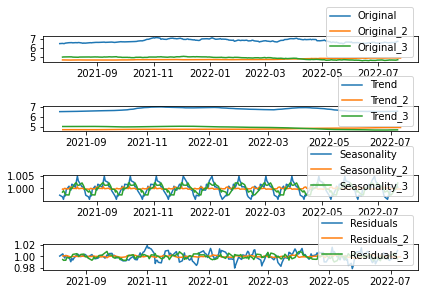

In [22]:
plot_rolling_statistics(ts_log, window=12)
plot_rolling_statistics(ts_2_log, window=12)
plot_rolling_statistics(ts_3_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_log)
augmented_dickey_fuller_test(ts_2_log)
augmented_dickey_fuller_test(ts_3_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=20, model='multiplicative') 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
decomposition_2 = seasonal_decompose(ts_2_log, freq=20, model='multiplicative') 
trend_2 = decomposition_2.trend
seasonal_2 = decomposition_2.seasonal
residual_2 = decomposition_2.resid
decomposition_3 = seasonal_decompose(ts_3_log, freq=20, model='multiplicative') 
trend_3 = decomposition_3.trend
seasonal_3 = decomposition_3.seasonal
residual_3 = decomposition_3.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout();

plt.subplot(411)
plt.plot(ts_2_log, label='Original_2')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_2, label='Trend_2')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_2,label='Seasonality_2')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_2, label='Residuals_2')
plt.legend(loc='best')
plt.tight_layout();

plt.subplot(411)
plt.plot(ts_3_log, label='Original_3')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_3, label='Trend_3')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_3,label='Seasonality_3')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_3, label='Residuals_3')
plt.legend(loc='best')
plt.tight_layout();

In [23]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.814668
p-value                          0.000051
#Lags Used                      10.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


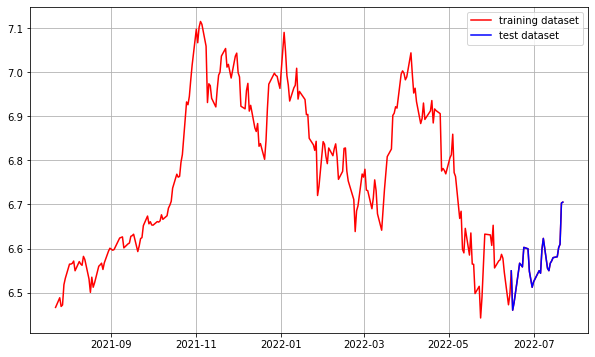

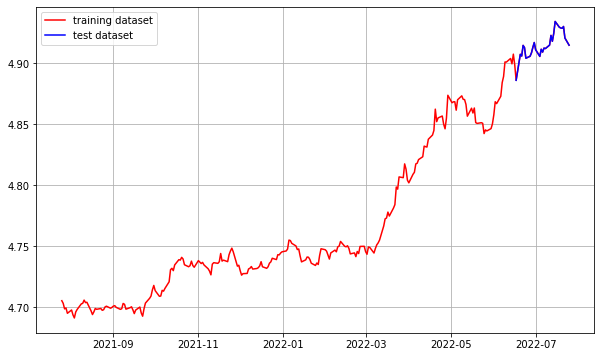

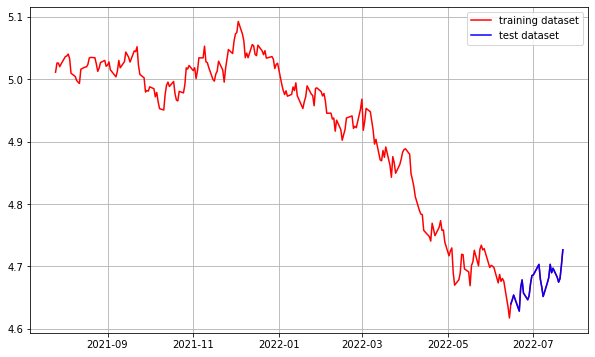

In [24]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
train_data_2, test_data_2 = ts_2_log[:int(len(ts_2_log)*0.9)], ts_2_log[int(len(ts_2_log)*0.9):]
train_data_3, test_data_3 = ts_3_log[:int(len(ts_3_log)*0.9)], ts_3_log[int(len(ts_3_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_2_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_2, c='b', label='test dataset')
plt.legend()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_3_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_3, c='b', label='test dataset')
plt.legend()

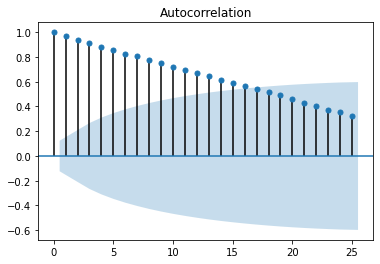

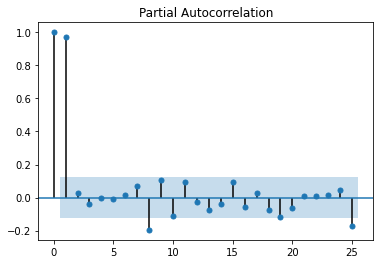

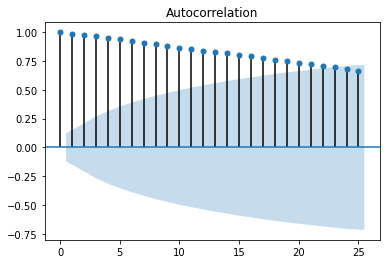

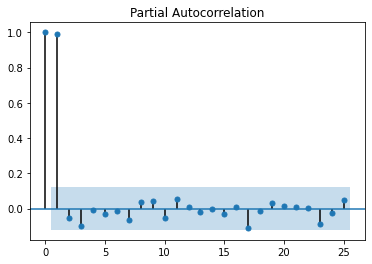

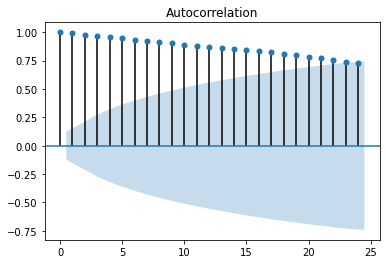

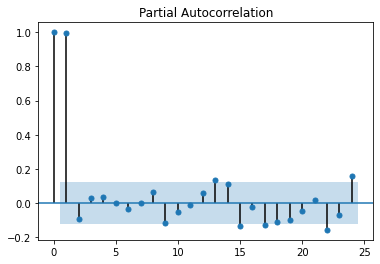

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
plot_acf(ts_2_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_2_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()
plot_acf(ts_3_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_3_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

* AR(p) 에서 p가 대략 1에서 0으로 바겼으므로 p = 1 로 하고 MA(q)에서는 0으로 바뀌는 q값을 그림만으로 찾을 수 없으므로 q = 0 으로 둔다.
* AR(p) 에서 p가 대략 1에서 0으로 바꼈으므로 p = 1 로 하고 MA(q)에서는 0으로 바뀌는 q값을 그림만으로 찾을 수 없으므로 q = 0 으로 둔다.
* 3번째 회사도 같게 정한다.

Results of Dickey-Fuller Test:
Test Statistic                  -4.962426
p-value                          0.000026
#Lags Used                       9.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -6.732593e+00
p-value                        3.267383e-09
#Lags Used                     1.600000e+01
Number of Observations Used    2.330000e+02
Critical Value (1%)           -3.458731e+00
Critical Value (5%)           -2.874026e+00
Critical Value (10%)          -2.573424e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -4.962426
p-value                          0.000026
#Lags Used                       9.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)   

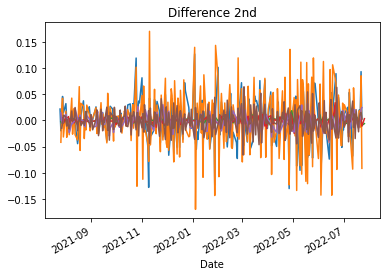

In [26]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

# 혹시 필요한 경우 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)
augmented_dickey_fuller_test(diff_1)

print('----------------------------------')

# 1차 차분 구하기
diff_1_2 = ts_2_log.diff(periods=1).iloc[1:]
diff_1_2.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_2)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_2 = diff_1_2.diff(periods=1).iloc[1:]
diff_2_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_2)
augmented_dickey_fuller_test(diff_1_2)

print('----------------------------------')

# 1차 차분 구하기
diff_1_3 = ts_3_log.diff(periods=1).iloc[1:]
diff_1_3.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1_2)

# 혹시 필요한 경우 2차 차분 구하기
diff_2_3 = diff_1_3.diff(periods=1).iloc[1:]
diff_2_3.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2_3)
augmented_dickey_fuller_test(diff_1_3)

* 테슬라 : 2차분에서 p-value가 안정적이므로 d = 2를 우선적으로 하고 좋은 결과를 위해 1로 조절해본다.
* JPY=X : 1차분에서 p-value가 안정적이므로 d = 1을 우선적으로 하고 좋은 결과를 위해 2로 조절해본다. 
* ZROZ : 1차분에서 p-value가 안정적이므로 d = 1을 우선적으로 하고 좋은 결과를 위해
2로 조절해본다.

In [27]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit() 

print(fitted_m.summary());
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
model_2 = ARIMA(train_data_2, order=(1, 1, 0))  
fitted_m_2 = model_2.fit() 

print(fitted_m_2.summary());
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
model_3 = ARIMA(train_data_3, order=(1, 1, 0))  
fitted_m_3 = model_3.fit() 

print(fitted_m_3.summary());

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: 

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  225
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 408.551
Method:                       css-mle   S.D. of innovations              0.039
Date:                Thu, 28 Jul 2022   AIC                           -811.101
Time:                        18:22:52   BIC                           -800.853
Sample:                             1   HQIC                          -806.965
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0001      0.003      0.049      0.961      -0.005       0.005
ar.L1.D.Close    -0.0317      0.067     -0.477      0.634      -0.162       0.099
                                    Root

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


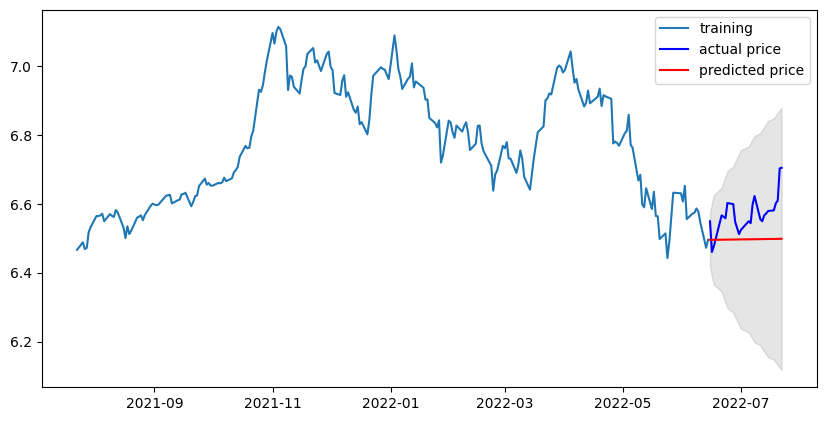

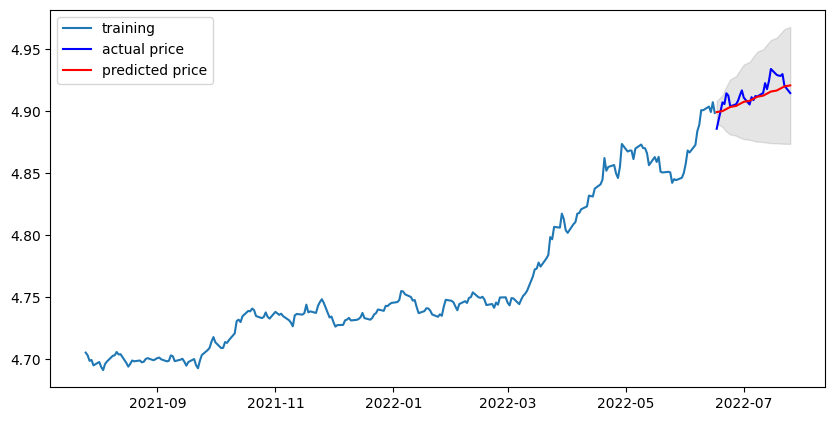

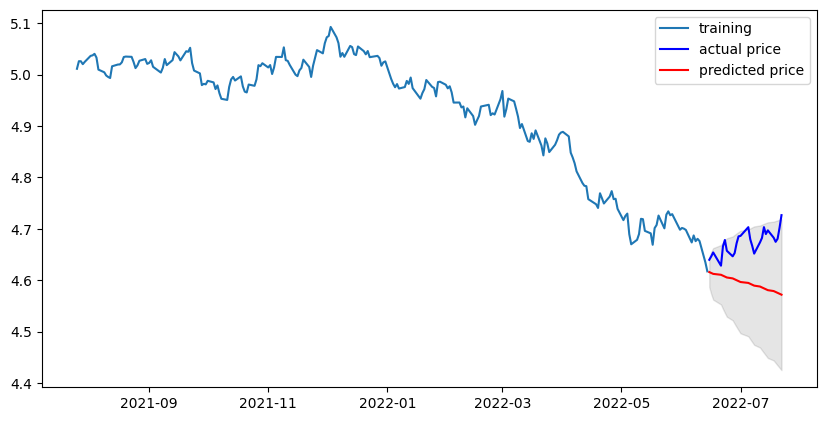

In [28]:
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show();

fc_2, se_2, conf_2 = fitted_m_2.forecast(len(test_data_2), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_2 = pd.Series(fc_2, index=test_data_2.index)   # 예측결과
lower_series_2 = pd.Series(conf_2[:, 0], index=test_data_2.index)  # 예측결과의 하한 바운드
upper_series_2 = pd.Series(conf_2[:, 1], index=test_data_2.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_2, label='training')
plt.plot(test_data_2, c='b', label='actual price')
plt.plot(fc_series_2, c='r',label='predicted price')
plt.fill_between(lower_series_2.index, lower_series_2, upper_series_2, color='k', alpha=.10)
plt.legend()
plt.show();

fc_3, se_3, conf_3 = fitted_m_3.forecast(len(test_data_3), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series_3 = pd.Series(fc_3, index=test_data.index)   # 예측결과
lower_series_3 = pd.Series(conf_3[:, 0], index=test_data_3.index)  # 예측결과의 하한 바운드
upper_series_3 = pd.Series(conf_3[:, 1], index=test_data_3.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data_3, label='training')
plt.plot(test_data_3, c='b', label='actual price')
plt.plot(fc_series_3, c='r',label='predicted price')
plt.fill_between(lower_series_3.index, lower_series_3, upper_series_3, color='k', alpha=.10)
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  4146.1588502599625
MAE:  54.210585179738196
RMSE:  64.39067362794059
MAPE: 7.36%


In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_2), np.exp(fc_2))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_2), np.exp(fc_2))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_2), np.exp(fc_2)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_2) - np.exp(test_data_2))/np.abs(np.exp(test_data_2)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  1.2212355098139018
MAE:  0.8841294721270193
RMSE:  1.1050952492042945
MAPE: 0.65%


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_3), np.exp(fc_3))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_3), np.exp(fc_3))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_3), np.exp(fc_3)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_3) - np.exp(test_data_3))/np.abs(np.exp(test_data_3)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  80.70353296599693
MAE:  8.278362702925737
RMSE:  8.983514510813512
MAPE: 7.66%


세가지 주식 모두 (p, d, q) = (1, 1, 0)에서 MAPE가 안정적으로 나왔다. d값은 p-value의 2차 차분이 더 작은 경우가 있었으나 학습 결과가 좋지 않아서 제외시켰다. 세 주식 모두 AR(p)에 대해서는 p가 1부근에서 0이 된다는 사실이 확인되었고  MA(q)에 대해서는 q가 0가 되는 점을 구간에서 찾지 못해서 0으로 두게 되었다.

